<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tarea/04_no_supervisado_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [72]:
# Crgar dataset desde mi github
url = "https://raw.githubusercontent.com/jsaulme/datasets/main/Global_superstore2018_procesado.csv"
data = pd.read_csv(url)
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
0,MX-2017-SC2057582-43010,2017-10-02,2017-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,0,Mexico City,Distrito Federal,...,4.56,2.033,Medium,2017,10,2,6,10,2017,4
1,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,90.72,13.449,Medium,2015,10,15,20,10,2015,5
2,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,54.08,9.627,Medium,2015,10,15,20,10,2015,5


In [73]:
data.dtypes

Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code         int64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
Order Year          int64
Order Month         int64
Order Day           int64
Ship Day            int64
Ship Month          int64
Ship Year           int64
Delivery Time       int64
dtype: object

In [74]:
# Conversion de formato de celdas

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

El análisis de agrupamiento (clustering) es una técnica que nos permite identificar patrones en los datos al agrupar observaciones similares. Dos enfoques comunes son K-means y DBSCAN. Estos métodos pueden ayudar a:

Identificar Patrones: Al agrupar datos similares, puedes descubrir segmentos con comportamientos distintos en términos de profits.

Exploración Inicial: El clustering es útil para explorar la estructura de los datos antes de aplicar el modelo ARIMA.

Segmentación de Clientes/Productos: Puedes usar el clustering para segmentar clientes o productos y analizar cómo cada grupo afecta los profits.


Aplicando esto al conjunto de datos “Global Super Store”, es posible  utilizar el clustering para entender por qué existen profits negativos. Al agrupar productos o clientes similares, se podría descubrir patrones que influyen en los resultados financieros. Por ejemplo, se podría identificar grupos de productos con bajas ventas o clientes con hábitos de compra específicos que afectan negativamente los profits. Esto proporcionaría información valiosa para ajustar el modelo ARIMA y tomar decisiones estratégicas.

# Determinar el numero de clusters de forma aleatoria: 3

In [75]:
# Selección de características relevantes para el clustering
caracteristicas = data[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]

# Verificación y conversión de columnas no numéricas
for col in caracteristicas.columns:
    if caracteristicas[col].dtype == object:
        print(f"Advertencia: Columna '{col}' contiene valores no numericos.")
        # Intentar convertir la columna a numérico
        try:
            caracteristicas[col] = pd.to_numeric(caracteristicas[col])
        except ValueError:
            print(f"No se puede convertir la columna '{col}' a numerico. Considera remover o manejar esos valores.")
            # Manejar valores no convertibles (eliminarlos o reemplazarlos)
            caracteristicas[col] = pd.to_numeric(caracteristicas[col], errors='coerce')

# Eliminar filas con valores no convertibles (NaN)
caracteristicas.dropna(inplace=True)

# Escalado de los datos
scaler = StandardScaler()
scaled_caracteristicas = scaler.fit_transform(caracteristicas)

# Aplicación del modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el número de clusters según sea necesario
kmeans.fit(scaled_caracteristicas)

# Añadir etiquetas de clusters al DataFrame original
data = data.loc[caracteristicas.index]  # Asegúrate de que los índices coincidan después de dropna
data['Cluster_KMeans'] = kmeans.labels_

# Seleccionar solo columnas numéricas para el análisis de clusters
numeric_columns = data.select_dtypes(include=[np.number]).columns
cluster_analysis = data.groupby('Cluster_KMeans')[numeric_columns].mean()

print(cluster_analysis)

<ipython-input-75-62a25eb60344>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caracteristicas.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 Postal Code        Sales  Quantity  Discount      Profit  \
Cluster_KMeans                                                              
0               11945.884110   176.269612  3.352456  0.043602   34.729387   
1                9230.775848  1804.485898  5.961125  0.060056  388.907669   
2                6820.333459   144.765436  3.357787  0.518296  -75.191339   

                Shipping Cost   Order Year  Order Month  Order Day   Ship Day  \
Cluster_KMeans                                                                  
0                   17.748545  2015.774630     7.516533  15.808481  15.839533   
1                  213.692593  2015.782878     7.560794  15.934243  15.892060   
2                   15.303508  2015.785178     7.504039  15.763010  15.972478   

                Ship Month    Ship Year  Delivery Time  Cluster_KMeans  
Cluster_KMeans                                                          
0                 7.470465  2015.789306       3.994114        

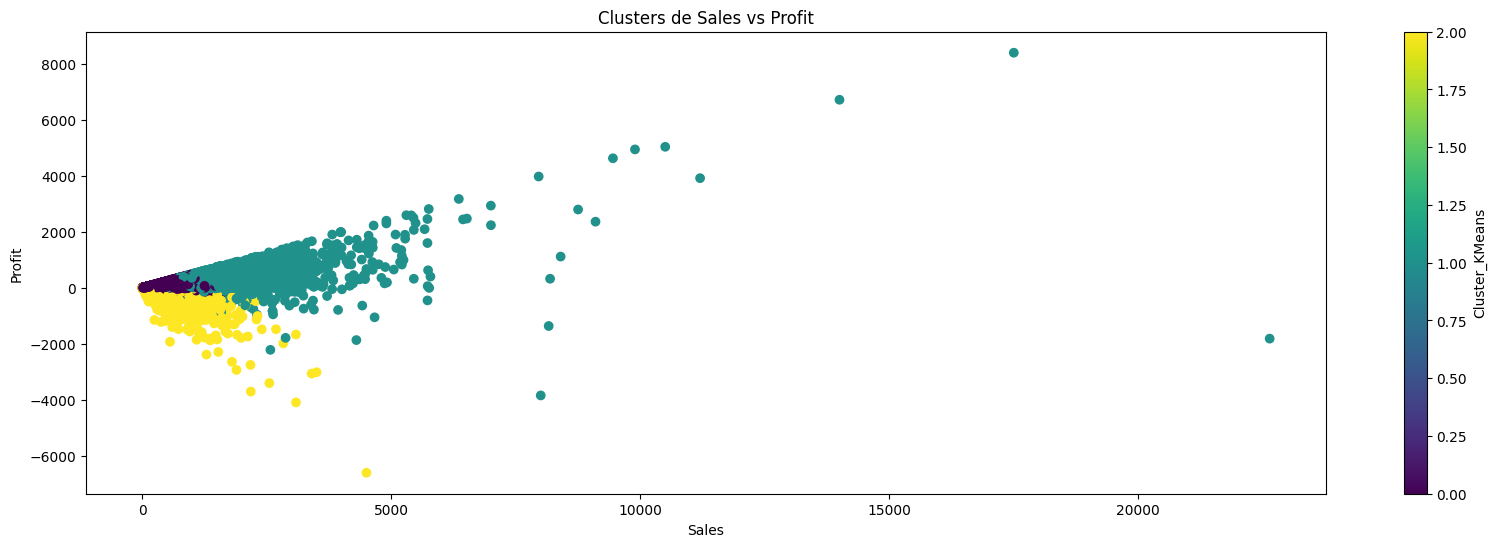

In [76]:
# Visualización de los clusters
plt.figure(figsize=(20, 6))
plt.scatter(data['Sales'], data['Profit'], c=data['Cluster_KMeans'], cmap='viridis')
plt.title('Clusters de Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar(label='Cluster_KMeans')
plt.show()

In [79]:
# Filtra los datos donde la columna "Cluster_KMeans" sea igual a 1
data[data['Cluster_KMeans'] == 1].head(3).iloc[:, 18:]

,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time,Cluster_KMeans
57,5,0.0,488.60,447.657,High,2014,5,16,19,5,2014,3,1
61,3,0.0,139.98,220.767,High,2017,5,16,16,5,2017,0,1
68,3,0.0,411.06,164.447,Low,2016,7,23,29,7,2016,6,1


# Ahora determinemos el numero ideal de clusters

In [80]:
# Calcular WCSS para diferentes números de clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_caracteristicas)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# Calcular el numero de clusters con un numero aleatorio: 15

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

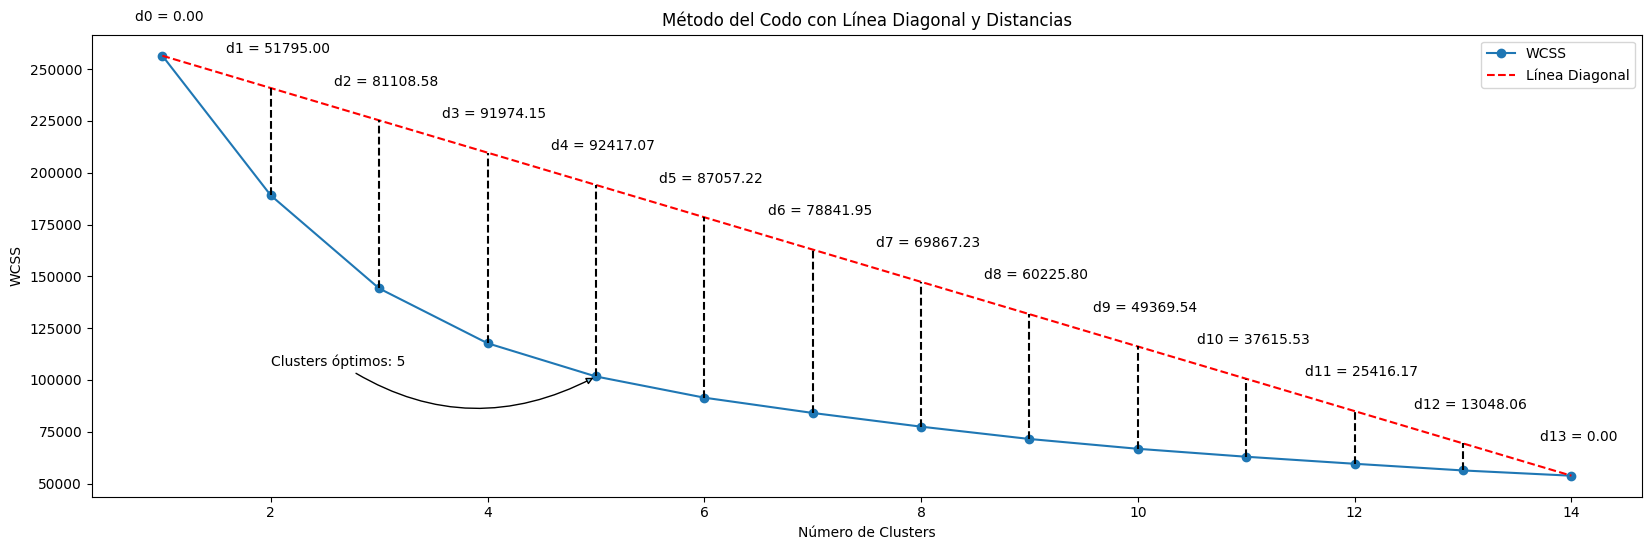

El número óptimo de clusters es: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                  Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  MX-2017-SC2057582-43010 2017-10-02 2017-10-06  Standard Class  SC-2057582   
1  MX-2015-KW1657028-42292 2015-10-15 2015-10-20  Standard Class  KW-1657028   
2  MX-2015-KW1657028-42292 2015-10-15 2015-10-20  Standard Class  KW-1657028   
3  MX-2015-KW1657028-42292 2015-10-15 2015-10-20  Standard Class  KW-1657028   
4  MX-2015-KW1657028-42292 2015-10-15 2015-10-20  Standard Class  KW-1657028   

    Customer Name   Segment  Postal Code           City             State  \
0    Sonia Cooley  Consumer            0    Mexico City  Distrito Federal   
1  Kelly Williams  Consumer            0  Dos Quebradas         Risaralda   
2  Kelly Williams  Consumer            0  Dos Quebradas         Risaralda   
3  Kelly Williams  Consumer            0  Dos Quebradas         Risaralda   
4  Kelly Williams  Consumer            0  Dos Quebradas         Risaralda   

   ... Order Priority Order Year Order Month Order Day S

In [81]:
# Calcular WCSS para diferentes números de clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_caracteristicas)
    wcss.append(kmeans.inertia_)

# Crear la figura del codo
plt.figure(figsize=(20, 6))
plt.plot(range(1, 15), wcss, marker='o', label='WCSS')

# Calcular los puntos extremos de la línea diagonal
x_coords = np.arange(1, 15)
y_start = wcss[0]
y_end = wcss[-1]
y_coords = np.linspace(y_start, y_end, num=len(x_coords))

# Trazar la línea diagonal
plt.plot(x_coords, y_coords, '--', color='red', label='Línea Diagonal')

# Calcular la distancia de cada punto a la línea diagonal y trazar las líneas verticales
distancias = []
for i in range(len(x_coords)):
    punto = (x_coords[i], wcss[i])
    linea_punto = (x_coords[i], y_coords[i])
    distancia = euclidean(punto, linea_punto)
    distancias.append(distancia)

    # Trazar líneas verticales
    plt.plot([x_coords[i], x_coords[i]], [wcss[i], y_coords[i]], '--', color='black')

    # Añadir anotaciones de distancia por encima de la línea punteada
    plt.annotate(f'd{i} = {distancia:.2f}',
                xy=(x_coords[i], max(wcss[i], y_coords[i])),  # Posición base de la etiqueta
                textcoords="offset points",  # Utilizar desplazamiento en puntos
                xytext=(5, 25),  # Desplazamiento de 0 en x y 10 en y (por encima de la posición base)
                ha='center')  # Alinear el texto al centro horizontalmente

# Determinar el número óptimo de clusters (punto con la mayor distancia a la línea diagonal)
num_clusters_optimo = x_coords[np.argmax(distancias)]

plt.annotate(f'Clusters óptimos: {num_clusters_optimo}',
             xy=(num_clusters_optimo, wcss[num_clusters_optimo-1]),
             xytext=(num_clusters_optimo-3, wcss[num_clusters_optimo-1]+5000),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.3', facecolor='skyblue'))

# Etiquetas y título
plt.title('Método del Codo con Línea Diagonal y Distancias')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

print(f'El número óptimo de clusters es: {num_clusters_optimo}')

# Realizar KMeans con el número óptimo de clusters
kmeans_optimo = KMeans(n_clusters=num_clusters_optimo, random_state=42)
data['Cluster_EBW15'] = kmeans_optimo.fit_predict(scaled_caracteristicas)

In [84]:
data.head().iloc[:, 20:]

,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time,Cluster_KMeans,Cluster_EBW15
0,4.56,2.033,Medium,2017,10,2,6,10,2017,4,0,4
1,90.72,13.449,Medium,2015,10,15,20,10,2015,5,0,0
2,54.08,9.627,Medium,2015,10,15,20,10,2015,5,0,4
3,4.96,1.371,Medium,2015,10,15,20,10,2015,5,0,4
4,11.44,3.787,Medium,2015,10,15,20,10,2015,5,0,4


# Ahora calculamos los clusters con 30. Un cluster por cada columna

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

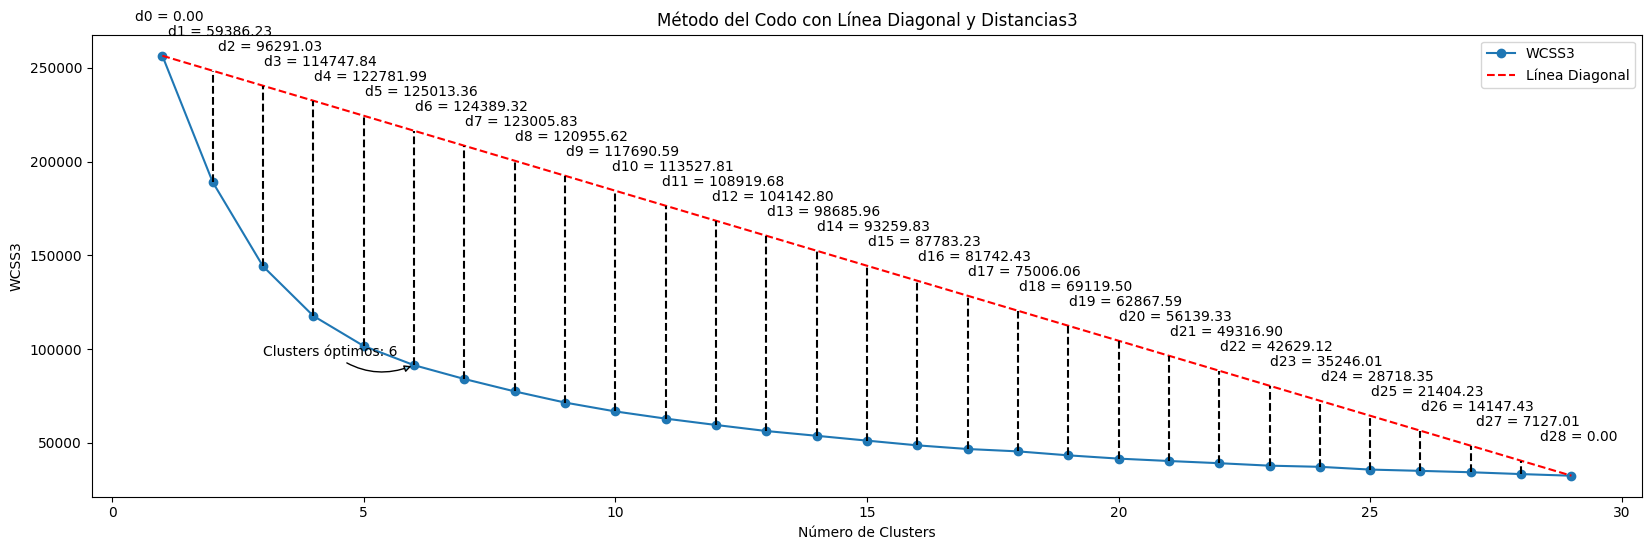

El número óptimo de clusters es: 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
# Calcular WCSS3 para diferentes números de clusters
wcss3 = []
for i in range(1, 30):
    kmeans3 = KMeans(n_clusters=i, random_state=42)
    kmeans3.fit(scaled_caracteristicas)
    wcss3.append(kmeans3.inertia_)

# Crear la figura del codo
plt.figure(figsize=(20, 6))
plt.plot(range(1, 30), wcss3, marker='o', label='WCSS3')

# Calcular los puntos extremos de la línea diagonal
x_coords3 = np.arange(1, 30)
y_start3 = wcss3[0]
y_end3 = wcss3[-1]
y_coords3 = np.linspace(y_start3, y_end3, num=len(x_coords3))

# Trazar la línea diagonal
plt.plot(x_coords3, y_coords3, '--', color='red', label='Línea Diagonal')

# Calcular la distancia de cada punto a la línea diagonal y trazar las líneas verticales
distancias3 = []
for i in range(len(x_coords3)):
    punto3 = (x_coords3[i], wcss3[i])
    linea_punto3 = (x_coords3[i], y_coords3[i])
    distancia3 = euclidean(punto3, linea_punto3)
    distancias3.append(distancia3)

    # Trazar líneas verticales
    plt.plot([x_coords3[i], x_coords3[i]], [wcss3[i], y_coords3[i]], '--', color='black')

    # Añadir anotaciones de distancia3 por encima de la línea punteada
    plt.annotate(f'd{i} = {distancia3:.2f}',
                xy=(x_coords3[i], max(wcss3[i], y_coords3[i])),  # Posición base de la etiqueta
                textcoords="offset points",  # Utilizar desplazamiento en puntos
                xytext=(5, 25),  # Desplazamiento de 0 en x y 10 en y (por encima de la posición base)
                ha='center')  # Alinear el texto al centro horizontalmente

# Determinar el número óptimo de clusters (punto3 con la mayor distancia a la línea diagonal)
num_clusters_optimo3 = x_coords3[np.argmax(distancias3)]

plt.annotate(f'Clusters óptimos: {num_clusters_optimo3}',
             xy=(num_clusters_optimo3, wcss3[num_clusters_optimo3-1]),
             xytext=(num_clusters_optimo3-3, wcss3[num_clusters_optimo3-1]+5000),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.3', facecolor='skyblue'))

# Etiquetas y título
plt.title('Método del Codo con Línea Diagonal y Distancias3')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS3')
plt.legend()
plt.show()

print(f'El número óptimo de clusters es: {num_clusters_optimo3}')

# Realizar KMeans con el número óptimo de clusters
kmeans_optimo3 = KMeans(n_clusters=num_clusters_optimo3, random_state=42)
data['Cluster_EBW30'] = kmeans_optimo3.fit_predict(scaled_caracteristicas)

In [86]:
data.head().iloc[:, 20:]

,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time,Cluster_KMeans,Cluster_EBW15,Cluster_EBW30
0,4.56,2.033,Medium,2017,10,2,6,10,2017,4,0,4,0
1,90.72,13.449,Medium,2015,10,15,20,10,2015,5,0,0,5
2,54.08,9.627,Medium,2015,10,15,20,10,2015,5,0,4,0
3,4.96,1.371,Medium,2015,10,15,20,10,2015,5,0,4,0
4,11.44,3.787,Medium,2015,10,15,20,10,2015,5,0,4,0


# Modelo DBSCAN

In [69]:
# Extrae las columnas relevantes de tu DataFrame
X = data[["Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost"]]

# Aplica el escalado si es necesario
X_scaled = StandardScaler().fit_transform(X)

# Calcula DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Número de clusters en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de puntos de ruido: %d' % n_noise_)

Número estimado de clusters: 59
Número estimado de puntos de ruido: 1348


In [70]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Product Name', 'Sub-Category',
       'Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Order Year', 'Order Month', 'Order Day', 'Ship Day',
       'Ship Month', 'Ship Year', 'Delivery Time', 'Cluster'],
      dtype='object')

# Metricas para DBSCAN segun los clusters de KMeans

In [87]:
# 'Cluster_KMeans' es la columna en tu DataFrame con las etiquetas verdaderas
labels_true = data["Cluster_KMeans"]

# Calcula las métricas de evaluación
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Homogeneity: 0.462
Completeness: 0.110
V-measure: 0.178
Adjusted Rand Index: 0.057
Adjusted Mutual Information: 0.177
Silhouette Coefficient: -0.576


# Metricas para DBSCAN segun los clusters de Metodo de Codo con 15 clusters

In [88]:
# 'Cluster_EBW15' es la columna en tu DataFrame con las etiquetas verdaderas
labels_true2 = data["Cluster_EBW15"]

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true2, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true2, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true2, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true2, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true2, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Homogeneity: 0.607
Completeness: 0.248
V-measure: 0.352
Adjusted Rand Index: 0.155
Adjusted Mutual Information: 0.351
Silhouette Coefficient: -0.576


# Metricas para DBSCAN segun los clusters de Metodo de Codo con 30 clusters

In [89]:
# 'Cluster_EBW30' es la columna en tu DataFrame con las etiquetas verdaderas
labels_true3 = data["Cluster_EBW30"]

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true3, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true3, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true3, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true3, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true3, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Homogeneity: 0.608
Completeness: 0.256
V-measure: 0.360
Adjusted Rand Index: 0.157
Adjusted Mutual Information: 0.359
Silhouette Coefficient: -0.576


# Graficar los resultados

Homogeneity: 0.608
Completeness: 0.256
V-measure: 0.360
Adjusted Rand Index: 0.157
Adjusted Mutual Information: 0.359
Silhouette Coefficient: -0.576


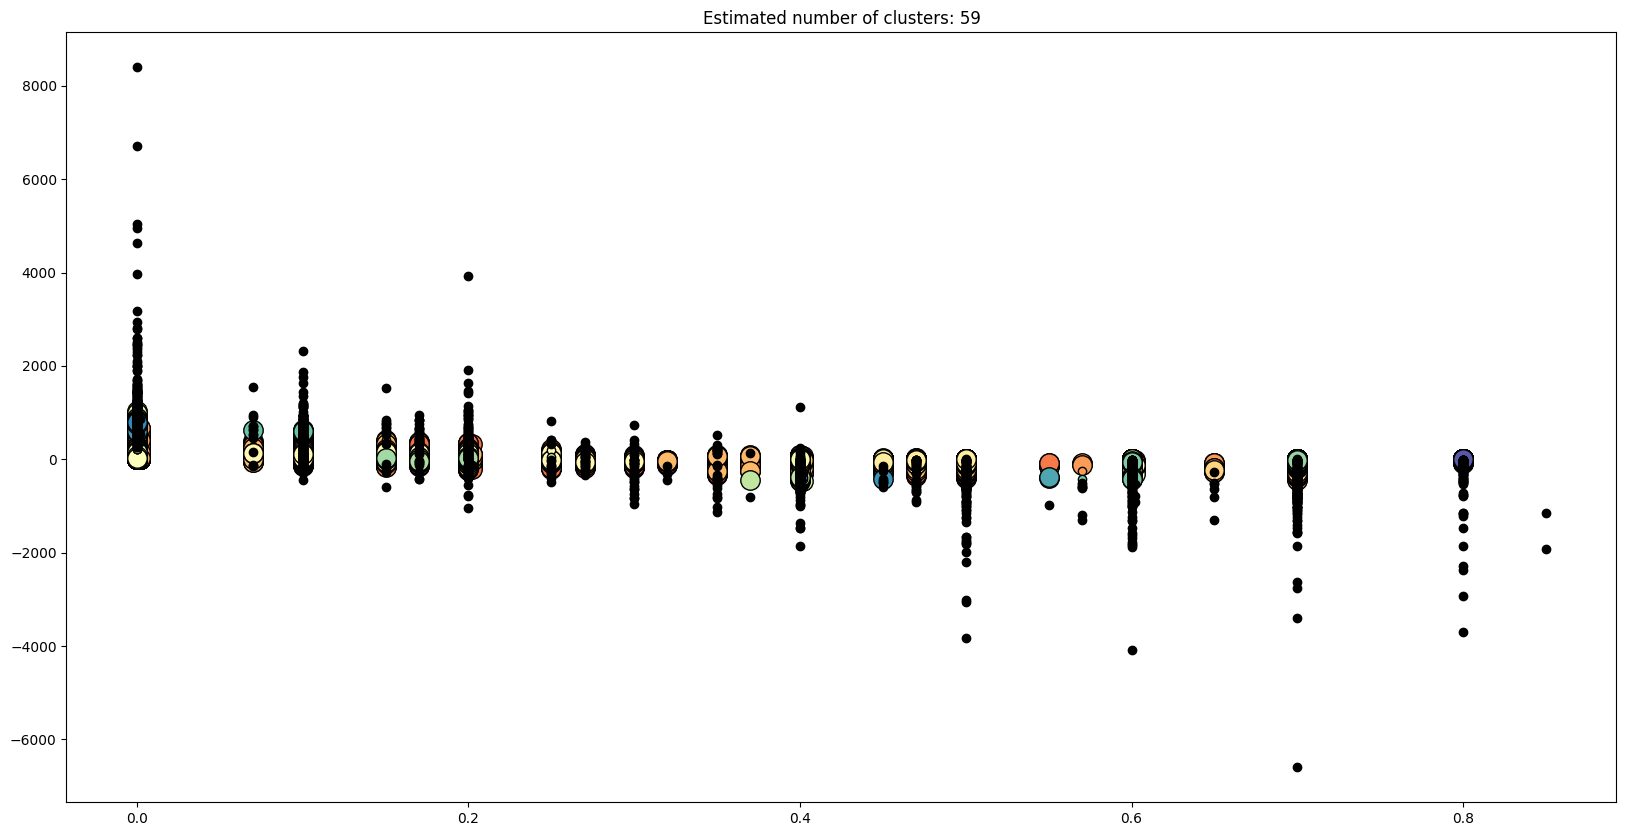

In [93]:
# 'Cluster_EBW30' es la columna en tu DataFrame con las etiquetas verdaderas
labels_true3 = data["Cluster_EBW30"]

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true3, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true3, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true3, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true3, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true3, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True


colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Ajustar el tamaño del gráfico
plt.figure(figsize=(20, 10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Convert the filtered DataFrame to a NumPy array for slicing
    xy = X[class_member_mask & core_samples_mask].values
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask].values # Convert the filtered DataFrame to a NumPy array for slicing
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

En el articulo "Improving forecasts for noisy geographic time series" publicado por Huddleston, Porter y Brown en Journal of Bussines Research (2015) tratan predecir el número de eventos (como robos, ventas, etc.) que ocurren en diferentes áreas durante ciertos periodos de tiempo en una ciudad dividida en varias zonas. Queremos saber cuántos eventos sucederán en cada zona en cada semana, mes o año.

Este estudio emplea un diseño de horizonte rodante para evaluar la precisión de los pronósticos de crímenes en Pittsburgh. Utiliza datos semanales anteriores para desarrollar modelos de pronóstico y predecir crímenes en las semanas siguientes. Los modelos necesitan un mínimo de observaciones previas para considerar tendencias y estacionalidad. Se evalúan dos periodos de tiempo: los primeros tres años y un periodo específico de 96 semanas, utilizando los primeros tres años de datos para inicializar los modelos.

El estudio aborda el uso de modelos ARIMA para desarrollar pronósticos desagregados para cada región. Este proceso se automatiza utilizando el paquete de software R, que aplica todos los modelos ARIMA apropiados a los datos de entrenamiento, optimiza los parámetros de esos modelos y selecciona el mejor modelo según el Criterio de Información de Akaike (AIC). Este enfoque requiere software estadístico sofisticado y un analista que sepa cómo usar el software, lo que le otorga una puntuación de complejidad de 2.

Además, se discuten los pronósticos de arriba hacia abajo, que modelan los recuentos de eventos en regiones geográficas como un proceso de espacio-tiempo separable. Este enfoque asume que cualquier efecto de tendencia o estacionalidad se aplica a todas las regiones geográficas por igual, eliminando la necesidad de modelar cada región individualmente. Los efectos de tendencia y estacionalidad se estiman a nivel de dominio y luego se aplican a todas las regiones simultáneamente.

Finalmente, el estudio considera tres métodos de ponderación de arriba hacia abajo para dividir el pronóstico de nivel de dominio a través de las regiones geográficas. Estos incluyen el pronóstico de arriba hacia abajo simple, los pronósticos de arriba hacia abajo suavizados exponencialmente y los pronósticos de arriba hacia abajo ponderados por probabilidad geográfica.

Esta discusión destaca la importancia de seleccionar el método de pronóstico adecuado en función de las necesidades específicas del análisis y las capacidades del analista. Mientras que los modelos ARIMA ofrecen una gran precisión, también requieren un mayor nivel de sofisticación y comprensión por parte del analista. Por otro lado, los métodos de pronóstico de arriba hacia abajo pueden ser más accesibles y aún proporcionar resultados útiles, especialmente cuando los efectos de tendencia y estacionalidad son consistentes en todas las regiones.

In [ ]:
# Clustering analysis on Global Superstore2018 dataset

- K-means clustering was performed to identify groups of products or customers with similar characteristics.
- The optimal number of clusters was determined using both the elbow method and the Davies-Bouldin index.
- DBSCAN clustering was also applied to the data and its performance was evaluated using various metrics.
- The results of the different clustering methods were compared and discussed.

# Forecasting methods for geographic time series

- The Huddleston, Porter, and Brown study on forecasting crime events in Pittsburgh was summarized.
- The use of ARIMA models and top-down forecasting methods was discussed.
- The importance of selecting the appropriate forecasting method based on the specific needs of the analysis and the capabilities of the analyst was emphasized.
